Q1: How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

A1: For matrix multiplication between two matrices, we need to multiply each row of the first matrix by each column of the second matrix. There are n rows in the first matrix, m columns in the second matrix, and k elements in each row of the first matrix (which is same as the number of rows in the second matrix), the total number of multiplications is:
$$
n \times m \times k
$$

Similarly, when we multiply a row by a column, we add the results of the multiplications. Since there are k elements in the row, k−1 additions are needed to sum these k products. Thus, the total number of additions is:
$$
n \times m \times (k-1)
$$

Q2: Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?



In [16]:
import numpy as np
import random
import time

##using list of lists

def multiplication(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])

    C = [[0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]

    return C

n, k, m = 20, 30, 30

def matrix(rows, cols):
    return [[random.randint(1, 10) for _ in range(cols)] for _ in range(rows)]

A = matrix(n, k)
B = matrix(k, m)

s = time.time()
C = multiplication(A, B)
e = time.time()
print("Time taken using list of lists:", e-s)

##using numpy
A_np = np.random.randint(1, 11, size=(n, k))
B_np = np.random.randint(1, 11, size=(k, m))

s = time.time()
C_np = np.dot(A_np, B_np)
e = time.time()

print("Time taken using NumPy:", e-s)

Time taken using list of lists: 0.006470203399658203
Time taken using NumPy: 0.00010132789611816406


As we can see, NumPy is faster because it performs numerical operations more efficiently using built-in functions. In contrast, using lists of lists involves Python's nested loops, which are slower, takes time to execute.

It was difficult to compare performance accurately when using smaller values for n, m, and k, as the difference in execution time is less noticeable with smaller values.

Q3: Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?


In [4]:
import numpy as np
import time

def median(arr):
    sor = sorted(arr)
    n = len(sor)
    if n % 2 == 0:
        return (sor[n // 2] + sor[n // 2 - 1]) / 2
    else:
        return sor[n // 2]

def median_quickselect(arr):
    def quickselect(arr, k):
        if len(arr) == 1:
            return arr[0]

        pivot = arr[len(arr) // 2]
        l = [x for x in arr if x < pivot]
        h = [x for x in arr if x > pivot]
        pivots = [x for x in arr if x == pivot]

        if k < len(l):
            return quickselect(l, k)
        elif k < len(l) + len(pivots):
            return pivots[0]
        else:
            return quickselect(h, k - len(l) - len(pivots))

    n = len(arr)
    if n % 2 == 1:
        return quickselect(arr, n // 2)
    else:
        return (quickselect(arr, n // 2 - 1) + quickselect(arr, n // 2)) / 2

np.random.seed(0)
arr = np.random.randint(1, 1000, size=1000).tolist()
##median using sorting
s = time.time()
re1 = median(arr)
e = time.time()
print("Median using sorting:", re1)
print("Time taken:", e - s)

##median using quickselect
s = time.time()
re2 = median_quickselect(arr)
e = time.time()
print("Median using quickselect:", re2)
print("Time taken:", e - s)

##median using numpy
s = time.time()
re3 = np.median(arr)
e = time.time()
print("Median using numpy:", re3)
print("Time taken:", e - s)

Median using sorting: 516.0
Time taken: 0.00031566619873046875
Median using quickselect: 516.0
Time taken: 0.002224445343017578
Median using numpy: 516.0
Time taken: 0.0030069351196289062


Time complexity for finding the median of an array is $$O(nlogn)$$ and for quickselect algorithm is $$O(n)$$

Q4: What is the gradient of the following function with respect to x and y?
$$
f(x, y) = x^2 y + y^3 \sin(x)
$$


A4: Gradient of function
$$
f(x, y) = x^2 y + y^3 \sin(x)
$$
Partial differentiation wrt x

$$
\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} \left( x^2 y + y^3 \sin(x) \right)
$$

$$
\frac{\partial f}{\partial x} = 2x y + y^3 \cos(x)
$$
Partial differentiation wrt y

$$
\frac{\partial f}{\partial y} = \frac{\partial}{\partial y} \left( x^2 y + y^3 \sin(x) \right)
$$

$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$

gradient is the vector of partial derivatives
$$
$$ $$
\left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = \left( 2xy + y^3 \cos(x), x^2 + 3y^2 \sin(x) \right)
$$

Q6: Use sympy to confirm that you obtain the same gradient analytically.

In [19]:
import sympy as sp

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
print("(",df_dx,",",df_dy,")")

( 2*x*y + y**3*cos(x) , x**2 + 3*y**2*sin(x) )


Q7:Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [8]:
record = {
    2022: {
        'Branch 1': {
            1: {'Name': 'A', 'Marks': {'Maths': 100, 'English': 70}},
        },
        'Branch 2': {
            1: {'Name': 'C', 'Marks': {'Maths': 90, 'English': 75}},
        }
    },
    2023: {
        'Branch 1': {
            1: {'Name': 'B', 'Marks': {'Maths': 95, 'English': 88}},
        },
        'Branch 2': {
            1: {'Name': 'D', 'Marks': {'Maths': 89, 'English': 90}},
        }
    },
    2024: {
        'Branch 1': {
            1: {'Name': 'G', 'Marks': {'Maths': 93, 'English': 85}},
        },
        'Branch 2': {
            1: {'Name': 'E', 'Marks': {'Maths': 94, 'English': 83}},
        }
    },
    2025: {
        'Branch 1': {
            1: {'Name': 'F', 'Marks': {'Maths': 91, 'English': 89}},
        },
        'Branch 2': {
            1: {'Name': 'H', 'Marks': {'Maths': 90, 'English': 87}},
        }
    }
}
def data(records):
    for year, branches in records.items():
        print(f"Year: {year}")
        for branch, students in branches.items():
            print(f"  {branch}:")
            for roll_number, details in students.items():
                name = details["Name"]
                marks = details["Marks"]
                print(f"    Roll Number: {roll_number}, Name: {name}, Marks: {marks}")

data(record)


Year: 2022
  Branch 1:
    Roll Number: 1, Name: A, Marks: {'Maths': 100, 'English': 70}
  Branch 2:
    Roll Number: 1, Name: C, Marks: {'Maths': 90, 'English': 75}
Year: 2023
  Branch 1:
    Roll Number: 1, Name: B, Marks: {'Maths': 95, 'English': 88}
  Branch 2:
    Roll Number: 1, Name: D, Marks: {'Maths': 89, 'English': 90}
Year: 2024
  Branch 1:
    Roll Number: 1, Name: G, Marks: {'Maths': 93, 'English': 85}
  Branch 2:
    Roll Number: 1, Name: E, Marks: {'Maths': 94, 'English': 83}
Year: 2025
  Branch 1:
    Roll Number: 1, Name: F, Marks: {'Maths': 91, 'English': 89}
  Branch 2:
    Roll Number: 1, Name: H, Marks: {'Maths': 90, 'English': 87}


Q9: Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

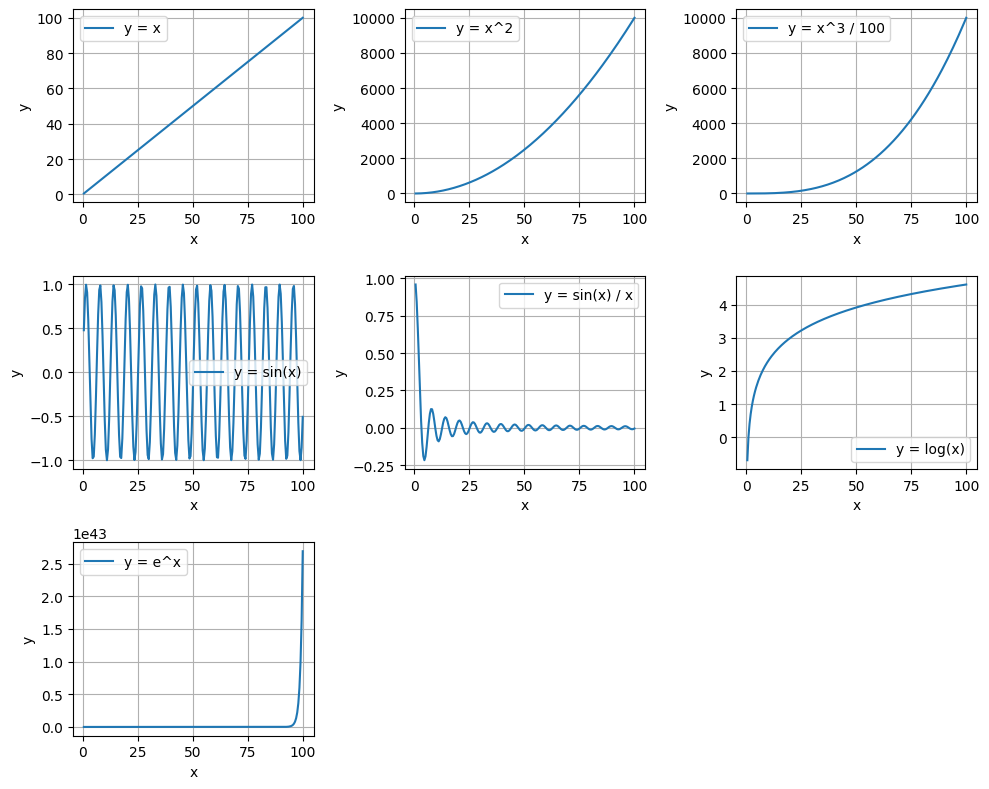

In [20]:

import matplotlib.pyplot as plt
import numpy as np

# Generate data
x = np.arange(0.5, 100.5, 0.5)

y1 = x
y2 = x**2
y3 = (x**3) / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(10, 8))

plt.subplot(3, 3, 1)
plt.plot(x, y1, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)


plt.subplot(3, 3, 2)
plt.plot(x, y2, label='y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(3, 3, 3)
plt.plot(x, y3, label='y = x^3 / 100')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(3, 3, 4)
plt.plot(x, y4, label='y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(3, 3, 5)
plt.plot(x, y5, label='y = sin(x) / x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)


plt.subplot(3, 3, 6)
plt.plot(x, y6, label='y = log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(3, 3, 7)
plt.plot(x, y7, label='y = e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Q10: Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [10]:
import pandas as pd
import numpy as np
A = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(A, columns=['a', 'b', 'c', 'd', 'e'])

sd = df.std()
sd_column = sd[sd == sd.max()].idxmax()

row_means = df.mean(axis=1)
lowest_mean_row = row_means[row_means == row_means.min()].idxmin()

print(df)
print("\nColumn with the highest standard deviation:", sd_column)
print("Row with the lowest mean:", lowest_mean_row)

           a         b         c         d         e
0   1.341698  1.676242  1.879235  1.543678  1.282700
1   1.030235  1.710337  1.007884  1.372679  1.530537
2   1.922111  1.089495  1.405942  1.024313  1.342611
3   1.622231  1.279068  1.209750  1.115703  1.577140
4   1.695270  1.671957  1.948861  1.002703  1.647197
5   1.600392  1.588740  1.962770  1.016872  1.696482
6   1.813679  1.509807  1.333965  1.790840  1.097243
7   1.442036  1.519952  1.693956  1.090886  1.227760
8   1.410302  1.623295  1.886961  1.618826  1.133461
9   1.980580  1.871786  1.502721  1.922348  1.541381
10  1.923306  1.829897  1.968286  1.919783  1.036034
11  1.174772  1.389135  1.952143  1.300029  1.160468
12  1.886305  1.446394  1.907876  1.160230  1.661118
13  1.440264  1.076487  1.696463  1.247399  1.039616
14  1.059944  1.061079  1.907733  1.739884  1.898062
15  1.672582  1.528940  1.304446  1.997962  1.362189
16  1.470649  1.378245  1.979527  1.174658  1.327988
17  1.680349  1.063208  1.607249  1.477647  1.

Q11: Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [11]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
num_lt8 = df[df['g'] == 'LT8'].shape[0]

std_f_lt8 = df[df['g'] == 'LT8']['f'].std()
std_f_gt8 = df[df['g'] == 'GT8']['f'].std()

print("\nNumber of rows where 'g' is 'LT8':", num_lt8)
print("Standard deviation of 'f' where 'g' is 'LT8':", std_f_lt8)
print("Standard deviation of 'f' where 'g' is 'GT8':", std_f_gt8)


Number of rows where 'g' is 'LT8': 17
Standard deviation of 'f' where 'g' is 'LT8': 0.4722892835351476
Standard deviation of 'f' where 'g' is 'GT8': 0.40241120350665477


Q12: Write a small piece of code to explain broadcasting in numpy.

In [12]:
n=np.array([[2, 4, 6],[3, 5, 7],[1, 2, 3]])
m=np.array([1, 2, 3])
print("array 1:")
print(n)
print("\narray 2:")
print(m)

#broadcasting
print("\nResult of n*m")
print(n*m)

array 1:
[[2 4 6]
 [3 5 7]
 [1 2 3]]

array 2:
[1 2 3]

Result of n*m
[[ 2  8 18]
 [ 3 10 21]
 [ 1  4  9]]


Q13: Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [13]:
def arg_min(a):

    index = 0
    n = a[0]

    for i in range(len(a)):
        if a[i] < n:
            n = a[i]
            index = i

    return index

a = np.array([17, 10, 19, 8, 14, 1])
index = arg_min(a)
index_using_np = np.argmin(a)

print("Index of min element:" ,index)
print("Index of min element using numpy:" ,index_using_np)


Index of min element: 5
Index of min element using numpy: 5
